In [2]:
%run PlottingSetup.ipynb
%matplotlib inline

Host Performance 0.0518218943619172
Device Performance 0.18790051402342273
Device Latenz 3.099442e-05


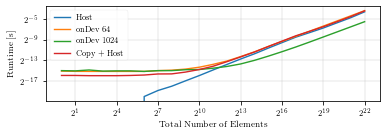

In [143]:
filename='rowredcost1024th.txt'
data1024 = np.genfromtxt(filename,delimiter='\t',dtype=float,skip_header=1,skip_footer=0)
filename='rowredcost512th.txt'
data512 = np.genfromtxt(filename,delimiter='\t',dtype=float,skip_header=1,skip_footer=0)
filename='rowredcost128th.txt'
data128 = np.genfromtxt(filename,delimiter='\t',dtype=float,skip_header=1,skip_footer=0)
filename='rowredcost64th.txt'
data64 = np.genfromtxt(filename,delimiter='\t',dtype=float,skip_header=1,skip_footer=0)

# import data

filename='copying.txt'
# import data
c_data = np.genfromtxt(filename,delimiter='\t',dtype=float,skip_header=1,skip_footer=0)

fig, ax = plt.subplots()

# plot functions, time
ax.plot(data64[:,0],data64[:,2],label='Host')
ax.plot(data64[:,0],data64[:,1],label='onDev 64')
ax.plot(data1024[:,0],data1024[:,1],label='onDev 1024')
ax.plot(data64[:,0],2*c_data[:,2]+data64[:,2],label='Copy + Host')


ax.set_ylabel('Runtime [s]')
ax.set_yscale('log',basey=2)
ax.set_xlabel('Total Number of Elements')
ax.set_xscale('log',basex=2)
ax.legend()
ax.grid(lw=.3)
fig.set_size_inches(w=width_latex,h=width_latex/3)
plt.subplots_adjust(left=0.1,bottom=.2)
save('RedCost')

print('Host Performance',data1024[-1,0]/data1024[-1,2]/1e9)
print('Device Performance',data1024[-1,0]/data1024[-1,1]/1e9)
print('Device Latenz',data1024[0,1])

[189.74355902 253.42163289 266.51975594]
[2.82417554 3.73573716 4.01287253]


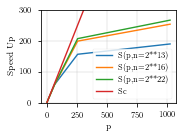

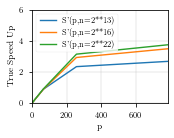

In [129]:
data = np.genfromtxt('rowredcost_analysis.txt',delimiter='\t',dtype=float,skip_header=1,skip_footer=0)

def linear_func(x,a,b):
    return a*x+b


fig, ax = plt.subplots()
speedups=[]
for length in np.unique(data[:,0])[[1,2,4]]:
    len_data=data[data[:,0]==length]
    ax.plot(len_data[:,1],len_data[:,2]/len_data[:,4],label="S(p,n=2**"+str(int(np.log2(length)))+")")
    speedups+=[len_data[:,2]/len_data[:,4]]

speedups_array=np.array(speedups)
until=len(len_data[len_data[:,1]<64])
su_popt, su_pcov = curve_fit(linear_func, len_data[:until,1], speedups_array.max(axis=0)[:until])
    
ax.plot(len_data[:,1],linear_func(len_data[:,1],*su_popt),label='Sc')

# ax.set_xlim(0,786)
ax.set_ylim(0,300)


ax.set_ylabel('Speed Up')
ax.set_xlabel('p')
# ax.set_yscale('log',basey=10)
# ax.set_xscale('log',basex=10)
ax.legend(loc='lower right')

ax.grid(lw=.3)
fig.set_size_inches(w=width_latex/2,h=width_latex/3)
plt.subplots_adjust(left=.25,bottom=.21)
save('ReductionSpeedUp')


fig, ax = plt.subplots()
true_speedups=[]
for length in np.unique(data[:,0])[[1,2,4]]:
    len_data=data[data[:,0]==length]
    ax.plot(len_data[:,1],len_data[:,3]/len_data[:,4],label="S'(p,n=2**"+str(int(np.log2(length)))+")")
    true_speedups+=[len_data[:,3]/len_data[:,4]]

ax.set_xlim(0,786)
ax.set_ylim(0,6)



ax.set_ylabel('True Speed Up')
ax.set_xlabel('p')
# ax.set_yscale('log',basey=10)
# ax.set_xscale('log',basex=10)
ax.legend(loc='upper left')

ax.grid(lw=.3)
fig.set_size_inches(w=width_latex/2,h=width_latex/3)
plt.subplots_adjust(left=.25,bottom=.21)
save('ReductionTrueSpeedUp')

print(np.array(speedups)[:,-1])
print(np.array(true_speedups)[:,-1])

/home/fabian/anaconda3/envs/RJupyter/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  if sys.path[0] == '':
/home/fabian/anaconda3/envs/RJupyter/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


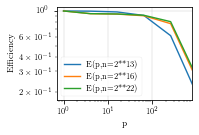

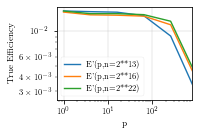

In [126]:
fig, ax = plt.subplots()

for length in np.unique(data[:,0])[[1,2,4]]:
    len_data=data[data[:,0]==length]
    ax.plot(len_data[:,1],len_data[:,2]/len_data[:,4]/len_data[:,1],label="E(p,n=2**"+str(int(np.log2(length)))+")")
    
ax.set_ylabel('Efficiency')
ax.set_xlabel('p')
ax.set_yscale('log',basey=10)
ax.set_xscale('log',basex=10)
ax.legend()
ax.set_xlim(0,786)

ax.grid(lw=.3)
fig.set_size_inches(w=width_latex/2,h=width_latex/3)
plt.subplots_adjust(left=.25,bottom=.21)
save('ReductionEfficiencies')


fig, ax = plt.subplots()

for length in np.unique(data[:,0])[[1,2,4]]:
    len_data=data[data[:,0]==length]
    ax.plot(len_data[:,1],len_data[:,3]/len_data[:,4]/len_data[:,1],label="E'(p,n=2**"+str(int(np.log2(length)))+")")
    

ax.set_ylabel('True Efficiency')
ax.set_xlabel('p')
ax.set_yscale('log',basey=10)
ax.set_xscale('log',basex=10)
ax.legend()
ax.set_xlim(0,786)

ax.grid(lw=.3)
fig.set_size_inches(w=width_latex/2,h=width_latex/3)
plt.subplots_adjust(left=.25,bottom=.21)
save('ReductionTrueEfficiencies')

Host Performance 4.8499225993886
Device Performance 38.088636612590975
Device Latenz 0.0001199245


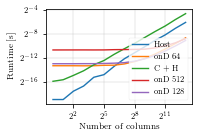

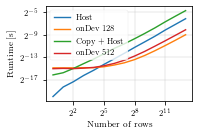

In [151]:
filename='rowredmr1024th.txt'
data1024 = np.genfromtxt(filename,delimiter='\t',dtype=float,skip_header=1,skip_footer=0)

filename='rowredmr512th.txt'
data512 = np.genfromtxt(filename,delimiter='\t',dtype=float,skip_header=1,skip_footer=0)

filename='rowredmr128th.txt'
data128 = np.genfromtxt(filename,delimiter='\t',dtype=float,skip_header=1,skip_footer=0)

filename='rowredmr64th.txt'
data64 = np.genfromtxt(filename,delimiter='\t',dtype=float,skip_header=1,skip_footer=0)

filename='rowredmr32.txt'
data32 = np.genfromtxt(filename,delimiter='\t',dtype=float,skip_header=1,skip_footer=0)

# import data
data = np.genfromtxt(filename,delimiter='\t',dtype=float,skip_header=1,skip_footer=0)
fig, ax = plt.subplots()

# plot functions, time
row_fixed_data=data64[data64[:,0]==2048]
ax.plot(row_fixed_data[:,1],row_fixed_data[:,3],label='Host')
ax.plot(row_fixed_data[:,1],row_fixed_data[:,2],label='onD 64')
ax.plot(row_fixed_data[:,1],row_fixed_data[:,3]+row_fixed_data[:,4]+row_fixed_data[:,5],label='C + H')
row_fixed_data=data512[data512[:,0]==2048]
ax.plot(row_fixed_data[:,1],row_fixed_data[:,2],label='onD 512')
row_fixed_data=data128[data128[:,0]==2048]
ax.plot(row_fixed_data[:,1],row_fixed_data[:,2],label='onD 128')

ax.set_ylabel('Runtime [s]')
ax.set_yscale('log',basey=2)
ax.set_xlabel('Number of columns')
ax.set_xscale('log',basex=2)
ax.legend()
ax.grid(lw=.3)
fig.set_size_inches(w=width_latex/2,h=width_latex/3)
plt.subplots_adjust(left=.2,bottom=.2)
save('RedMR_rowsfixed')

fig, ax = plt.subplots()
# plot functions, time
col_fixed_data=data128[data128[:,1]==2048]
ax.plot(col_fixed_data[:,0],col_fixed_data[:,3],label='Host')
ax.plot(col_fixed_data[:,0],col_fixed_data[:,2],label='onDev 128')
ax.plot(col_fixed_data[:,0],col_fixed_data[:,3]+col_fixed_data[:,4]+col_fixed_data[:,5],label='Copy + Host')
col_fixed_data=data512[data512[:,1]==2048]
ax.plot(col_fixed_data[:,0],col_fixed_data[:,2],label='onDev 512')


ax.set_ylabel('Runtime [s]')
ax.set_yscale('log',basey=2)
ax.set_xlabel('Number of rows')
ax.set_xscale('log',basex=2)
ax.legend()
ax.grid(lw=.3)
fig.set_size_inches(w=width_latex/2,h=width_latex/3)
plt.subplots_adjust(left=.2,bottom=.2)
save('RedMR_colsfixed')

print('Host Performance',row_fixed_data[-1,1]**2/row_fixed_data[-1,3]/1e9)
print('Device Performance',row_fixed_data[-1,1]**2/row_fixed_data[-1,2]/1e9)
print('Device Latenz',row_fixed_data[0,2])

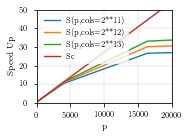

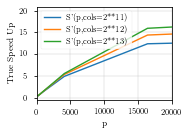

In [127]:
data = np.genfromtxt('rowredmr_analysis.txt',delimiter='\t',dtype=float,skip_header=1,skip_footer=0)

def linear_func(x,a,b):
    return a*x+b

row_fixed_data=data[data[:,0]==256]
fig, ax = plt.subplots()
speedups=[]
for length in np.unique(row_fixed_data[:,1])[3:]:
    len_data=row_fixed_data[row_fixed_data[:,1]==length]
    ax.plot(len_data[:,2]*len_data[:,0],len_data[:,3]/len_data[:,5],label="S(p,cols=2**"+str(int(np.log2(length)))+")")
    speedups+=[len_data[:,3]/len_data[:,5]]

speedups_array=np.array(speedups)
until=len(len_data[len_data[:,2]<64])
su_popt, su_pcov = curve_fit(linear_func, len_data[:until,2], speedups_array.max(axis=0)[:until])
    
ax.plot(len_data[:,2]*len_data[:,0],linear_func(len_data[:,2],*su_popt),label='Sc')

ax.set_xlim(0,20000)
ax.set_ylim(0,50)


ax.set_ylabel('Speed Up')
ax.set_xlabel('p')
# ax.set_yscale('log',basey=10)
# ax.set_xscale('log',basex=10)
ax.legend(loc='upper left')

ax.grid(lw=.3)
fig.set_size_inches(w=width_latex/2,h=width_latex/3)
plt.subplots_adjust(left=.25,bottom=.21)
save('ReductionMRSpeedUp')


fig, ax = plt.subplots()
true_speedups=[]
for length in np.unique(row_fixed_data[:,1])[3:]:
    len_data=row_fixed_data[row_fixed_data[:,1]==length]
    ax.plot(len_data[:,2]*len_data[:,0],len_data[:,4]/len_data[:,5],label="S'(p,cols=2**"+str(int(np.log2(length)))+")")
    true_speedups+=[len_data[:,4]/len_data[:,5]]

ax.set_xlim(0,20000)
# ax.set_ylim(0,6)



ax.set_ylabel('True Speed Up')
ax.set_xlabel('p')
# ax.set_yscale('log',basey=10)
# ax.set_xscale('log',basex=10)
ax.legend(loc='upper left')

ax.grid(lw=.3)
fig.set_size_inches(w=width_latex/2,h=width_latex/3)
plt.subplots_adjust(left=.25,bottom=.21)
save('ReductionMRTrueSpeedUp')

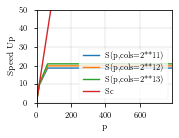

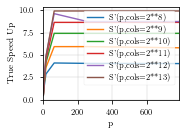

In [111]:
# col_fixed_data=data[data[:,1]==256]
# fig, ax = plt.subplots()
# speedups=[]
# for length in np.unique(col_fixed_data[:,0])[3:]:
#     len_data=col_fixed_data[col_fixed_data[:,0]==length]
#     ax.plot(len_data[:,2],len_data[:,3]/len_data[:,5],label="S(p,cols=2**"+str(int(np.log2(length)))+")")
#     speedups+=[len_data[:,3]/len_data[:,5]]

# speedups_array=np.array(speedups)
# until=len(len_data[len_data[:,2]<64])
# su_popt, su_pcov = curve_fit(linear_func, len_data[:until,2], speedups_array.max(axis=0)[:until])
    
# ax.plot(len_data[:,2],linear_func(len_data[:,2],*su_popt),label='Sc')

# ax.set_xlim(0,786)
# ax.set_ylim(0,50)


# ax.set_ylabel('Speed Up')
# ax.set_xlabel('p')
# # ax.set_yscale('log',basey=10)
# # ax.set_xscale('log',basex=10)
# ax.legend(loc='lower right')

# ax.grid(lw=.3)
# fig.set_size_inches(w=width_latex/2,h=width_latex/3)
# plt.subplots_adjust(left=.25,bottom=.21)
# save('ReductionMRSpeedUp')


# fig, ax = plt.subplots()
# true_speedups=[]
# for length in np.unique(col_fixed_data[:,0]):
#     len_data=col_fixed_data[col_fixed_data[:,0]==length]
#     ax.plot(len_data[:,2],len_data[:,4]/len_data[:,5],label="S'(p,cols=2**"+str(int(np.log2(length)))+")")
#     true_speedups+=[len_data[:,4]/len_data[:,5]]

# ax.set_xlim(0,786)
# # ax.set_ylim(0,6)



# ax.set_ylabel('True Speed Up')
# ax.set_xlabel('p')
# # ax.set_yscale('log',basey=10)
# # ax.set_xscale('log',basex=10)
# ax.legend(loc='upper right')

# ax.grid(lw=.3)
# fig.set_size_inches(w=width_latex/2,h=width_latex/3)
# plt.subplots_adjust(left=.25,bottom=.21)
# save('ReductionMRTrueSpeedUp')

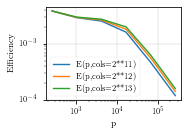

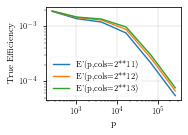

In [117]:
data = np.genfromtxt('rowredmr_analysis.txt',delimiter='\t',dtype=float,skip_header=1,skip_footer=0)

def linear_func(x,a,b):
    return a*x+b

row_fixed_data=data[data[:,0]==256]
fig, ax = plt.subplots()
speedups=[]
for length in np.unique(row_fixed_data[:,1])[3:]:
    len_data=row_fixed_data[row_fixed_data[:,1]==length]
    ax.plot(len_data[:,2]*len_data[:,0],len_data[:,3]/len_data[:,5]/(len_data[:,2]*len_data[:,0]),label="E(p,cols=2**"+str(int(np.log2(length)))+")")
    speedups+=[len_data[:,3]/len_data[:,5]]

# ax.set_xlim(0,20000)
# ax.set_ylim(0,50)


ax.set_ylabel('Efficiency')
ax.set_xlabel('p')
ax.set_yscale('log',basey=10)
ax.set_xscale('log',basex=10)
ax.legend(loc='lower left')

ax.grid(lw=.3)
fig.set_size_inches(w=width_latex/2,h=width_latex/3)
plt.subplots_adjust(left=.25,bottom=.21)
save('ReductionMREfficiency')


fig, ax = plt.subplots()
true_speedups=[]
for length in np.unique(row_fixed_data[:,1])[3:]:
    len_data=row_fixed_data[row_fixed_data[:,1]==length]
    ax.plot(len_data[:,2]*len_data[:,0],len_data[:,4]/len_data[:,5]/(len_data[:,2]*len_data[:,0]),label="E'(p,cols=2**"+str(int(np.log2(length)))+")")
    true_speedups+=[len_data[:,4]/len_data[:,5]]

# ax.set_xlim(0,20000)
# ax.set_ylim(0,6)



ax.set_ylabel('True Efficiency')
ax.set_xlabel('p')
ax.set_yscale('log',basey=10)
ax.set_xscale('log',basex=10)
ax.legend(loc='lower left')

ax.grid(lw=.3)
fig.set_size_inches(w=width_latex/2,h=width_latex/3)
plt.subplots_adjust(left=.25,bottom=.21)
save('ReductionMRTrueEfficiency')

True Speed Up 12.53231089629537
True Speed Up 12.53231089629537
Host Perf 1.7135839125171366
Device Perf 21.475166338554963
Device Latenz 0.0006241798


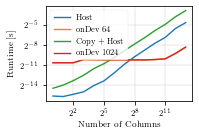

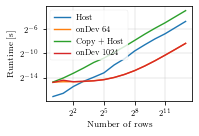

In [165]:
filename='colredmr1024th.txt'
data1024 = np.genfromtxt(filename,delimiter='\t',dtype=float,skip_header=1,skip_footer=0)

filename='colredmr512th.txt'
data512 = np.genfromtxt(filename,delimiter='\t',dtype=float,skip_header=1,skip_footer=0)

filename='colredmr128th.txt'
data128 = np.genfromtxt(filename,delimiter='\t',dtype=float,skip_header=1,skip_footer=0)

filename='colredmr64th.txt'
data64 = np.genfromtxt(filename,delimiter='\t',dtype=float,skip_header=1,skip_footer=0)

# import data
data = np.genfromtxt(filename,delimiter='\t',dtype=float,skip_header=1,skip_footer=0)
fig, ax = plt.subplots()

# plot functions, time
row_fixed_data=data64[data64[:,0]==8192]
ax.plot(row_fixed_data[:,1],row_fixed_data[:,3],label='Host')
ax.plot(row_fixed_data[:,1],row_fixed_data[:,2],label='onDev 64')
ax.plot(row_fixed_data[:,1],row_fixed_data[:,3]+row_fixed_data[:,4]+row_fixed_data[:,5],label='Copy + Host')
row_fixed_data=data1024[data1024[:,0]==8192]
ax.plot(row_fixed_data[:,1],row_fixed_data[:,2],label='onDev 1024')


ax.set_ylabel('Runtime [s]')
ax.set_yscale('log',basey=2)
ax.set_xlabel('Number of Columns')
ax.set_xscale('log',basex=2)
ax.legend()
ax.grid(lw=.3)
fig.set_size_inches(w=width_latex/2,h=width_latex/3)
plt.subplots_adjust(left=.2,bottom=.2)
save('RedMC_rowfixed')



fig, ax = plt.subplots()

# plot functions, time
col_fixed_data=data64[data64[:,1]==8192]
ax.plot(col_fixed_data[:,0],col_fixed_data[:,3],label='Host')
ax.plot(col_fixed_data[:,0],col_fixed_data[:,2],label='onDev 64')
ax.plot(col_fixed_data[:,0],col_fixed_data[:,3]+col_fixed_data[:,4]+col_fixed_data[:,5],label='Copy + Host')
col_fixed_data=data1024[data1024[:,1]==8192]
ax.plot(col_fixed_data[:,0],col_fixed_data[:,2],label='onDev 1024')


ax.set_ylabel('Runtime [s]')
ax.set_yscale('log',basey=2)
ax.set_xlabel('Number of rows')
ax.set_xscale('log',basex=2)
ax.legend()
ax.grid(lw=.3)
fig.set_size_inches(w=width_latex/2,h=width_latex/3)
plt.subplots_adjust(left=.2,bottom=.2)
save('RedMC_colfixed')

print('True Speed Up',col_fixed_data[-1,3]/col_fixed_data[-1,2])
print('True Speed Up',row_fixed_data[-1,3]/row_fixed_data[-1,2])

print('Host Perf',row_fixed_data[-1,1]**2/row_fixed_data[-1,3]/1e9)
print('Device Perf',row_fixed_data[-1,1]**2/row_fixed_data[-1,2]/1e9)
print('Device Latenz',row_fixed_data[0,2])